<a href="https://colab.research.google.com/github/GaiaSaveri/intro-to-ml/blob/main/notebooks/Lab-2.Polynomial_Regression_Bias_Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bias Variance Trade Off

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from math import pi as PI
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

* Generate data from the model $y=\sin(\pi\cdot x)+\varepsilon$, $\varepsilon\sim\mathcal{N}(0, \sigma)$
* Interpolate the data with different polynomial fittings.
* To test for generalization error we split the data into training and test. 

In [ ]:
plt.style.use('ggplot')

# for reproducibility across different runs, one may set a seed as follows:
# np.random.seed(42)

# number of observations
NUM_OBS = 1000

# predictors
x = np.linspace(0, 2, num = NUM_OBS)
# noise
eps = np.random.normal(0, 0.1, NUM_OBS)
# outcome
y = np.sin(PI*x)+ eps

fig = plt.figure(figsize=(7,7))
ax = plt.axes()
ax.set_title('y = sin(πx) + Ɛ')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x, y, c = 'k');

We use the Mean Square error to measure the fit error. 

$$
MSE = \frac{1}{N}\sum_{i=1}^{N}\;(y_{i}-y_{i}^{pred})^{2}
$$

$$
MSE = Bias^{2}+ Variance + Irriducible Error 
$$


**BIAS**


**Bias takes into account the difference between the model prediction and the real outcome**.

It depends mainly on the model we choose to solve our problem, and how the model assumptions can suitably interpret the relationship between predictors and outcome.

By observing our train set plot, we notice a non-linear trend. If we chose to model the relationship between $x$ and $y$ with a linear regression, the model assumptions would clearly fail to explain our function, which we know to be non-linear. In this case, we would obtain a model with high bias.

We can empirically assess that a model suffers from high bias because it shows a **high error on the train set**. Or, in other words, a low training performance: this condition goes under the name of **underfitting**.

High bias:

* Model assumptions fail to explain the relationship between predictors and outcome.

* Involves “simpler” (less flexible) models, such as linear regression.

* Leads to underfitting (poor train set performances).

**VARIANCE**

**Variance measures how different choices of the train sets would affect the the model parameters**.

When we train a machine learning model, we want that, by selecting a slightly different train set, the function would not change significantly. Otherwise, we would have obtained a model unable to generalize in front of small variations in the input data: this goes under the name of overfitting.

Intuitively, models with fewer assumptions do not suffer from high variance, as they do not change in front of small variations in the train set. Therefore, high variance is a problem that affects more flexible models, such as decision trees.

As the model is complex enough to overfit on a train set, we would expect high train performances (or low training error), but also poor test performances, as the model would require significant changes in the parameters to explain small variations in the data.

High variance:

- Involves more “complex” models (more flexible), such as decision trees.

- Leads to overfitting (poor test set performances).

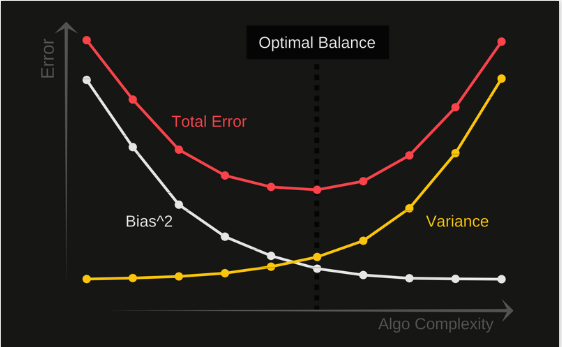

In [ ]:
# splitting training and test data using sklearn
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

fig = plt.figure(figsize = (7,7))
ax = plt.axes()
ax.set_title('y = sin(πx) + Ɛ')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x_train, y_train, label = "Train set")
ax.scatter(x_test, y_test, label = "Test set")
ax.legend();

In [ ]:
def fit_plot_poly(x_train, x_test, y_train, y_test, n_models):
    colors = iter(plt.cm.rainbow(np.linspace(0, 1, n_models)))

    fig, axs = plt.subplots(2, 2, figsize = (20,20))

    axs[0, 0].set_title('Train Set Predictions')
    axs[1, 0].set_title('Test Set Predictions')
    axs[0, 1].set_title('Train Set MSE')
    axs[1, 1].set_title('Test Set MSE')

    axs[0, 0].set_xlabel("x train")
    axs[0, 0].set_ylabel("y")
    axs[0, 0].set_ylim([-3, 3])

    axs[1, 0].set_xlabel("x test")
    axs[1, 0].set_ylabel("y")
    axs[1, 0].set_ylim([-3, 3])

    axs[0, 1].set_xlabel("polynomial degree")
    axs[0, 1].set_ylabel("train MSE")

    axs[1, 1].set_xlabel("polynomial degree")
    axs[1, 1].set_ylabel("test MSE")

    axs[0,0].scatter(x_train, y_train, c = 'k', label = "y train")
    axs[1,0].scatter(x_test, y_test, c = 'k', label = "y test")

    train_mse = []
    test_mse = []

    for k in range(0, n_models):

      c = next(colors)

      # k-th degree polynomial coefficients (least square polynomial fit)
      fit_coeff = np.polyfit(x_train, y_train, deg = k+1)

      # train and test k-th degree polynomial fit
      # we use the numpy functions for this
      y_train_pred = np.polyval(fit_coeff, x_train)
      y_test_pred = np.polyval(fit_coeff, x_test)

      # plot train and test k-th degree polynomial fit
      axs[0,0].scatter(x_train, y_train_pred, color = c, label = "deg: {}".format(k+1), s=1)
      axs[1,0].scatter(x_test, y_test_pred, color = c, label = "deg: {}".format(k+1), s=1)

      # train and test MSE of k-th degree polynomial fit 
      # use sklearn to compute the error
      iter_train_mse = mean_squared_error(y_train_pred, y_train)
      iter_test_mse = mean_squared_error(y_test_pred, y_test)

      train_mse.append(iter_train_mse)
      test_mse.append(iter_test_mse)


    # plot train and test MSE of k-th degree polynomial fit
      axs[0,1].plot(k+1,
                    iter_train_mse,
                    color = c,
                    label = "deg: {}".format(k+1),
                    marker = 'D',
                    markersize = 12,
                    markeredgecolor = 'black',
                    markeredgewidth = 3)
      
      axs[1,1].plot(k+1,
                    iter_test_mse,
                    color = c,
                    label = "deg: {}".format(k+1),
                    marker = 'D',
                    markersize = 12,
                    markeredgecolor = 'black',
                    markeredgewidth = 3)

    # plot dashed line to interpolate MSE measures
    axs[0,1].plot(range(1,n_models+1), train_mse, 'k--')
    axs[1,1].plot(range(1,n_models+1), test_mse, 'k--')

    # draw legends
    axs[0,1].legend(loc = "upper right",
                    bbox_to_anchor = (1.2, 1.01),
                    prop = {'size': 12});
    axs[1,1].legend(loc = "upper right",
                    bbox_to_anchor = (1.2, 1.01),
                    prop = {'size': 12});
    return train_mse, test_mse

In [ ]:
# build the dataset and split in train and test sets
x = np.linspace(0, 2, num = NUM_OBS)
eps = np.random.normal(0, 0.5, NUM_OBS)
y = np.sin(PI*x)+ eps
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
# number of polynomial models to investigate
NUM_MODELS = 21
train_mse, test_mse = fit_plot_poly(x_train, x_test, y_train, y_test, NUM_MODELS)

In [ ]:
print(train_mse)
print(test_mse)

If we look at the MSE plots over the polynomial degree (model complexity) from left to right, the increasing complexity of the models leads to a decrease in the train error (lower bias), but also a significant increase in the test error (high variance).

On the other hand, we also notice that the decreasing complexity of the models results in a poor train set performance (high bias) as well as better generalization on the test set (low variance).

The best fit is represented by the polynomial degree that minimizes the test error.



In [ ]:
print("Best fit polynomial degree: ", test_mse.index(min(test_mse)))

In conclusion, the best fit shows two characteristics: it fits well the train set (low train set error) and it generalizes well on unseen data (low test set error), as it minimizes both variance and bias. In our example, models with higher error presented either high variance or high bias. Hence, the name bias-variance trade-off.

What happens if we change the level of noise in the data? Why? 


*   Try to visually explore such variability using ther previoused defined function and think about an answer to the above question!

